## Principal Component Analysis
* Step: 1
  * Rotates data sampled to align with axes
* Step: 2
  * Shift samples so that they have mean of 0

In [0]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd

In [0]:
data=load_iris()

In [0]:
samples=data.data

In [0]:
model=PCA(2)
model.fit(samples)
transformed=model.transform(samples)

In [0]:
transformed.shape

(150, 2)

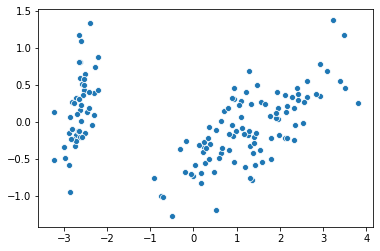

In [0]:
sns.scatterplot(transformed[:,0],transformed[:,1]) # this is a principal component representation of the 4d data to 2d data

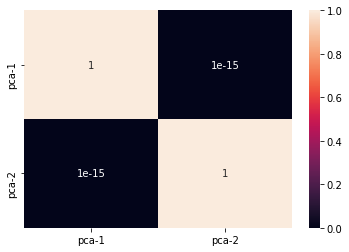

In [0]:
df=pd.DataFrame({
    'pca-1':transformed[:,0],
    'pca-2':transformed[:,1]
})
sns.heatmap(df.corr(),annot=True)#  there is correlation between each of the principal components
# this decorrelation is due to the realigning and shifting.

In [0]:
model.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [0]:
model.n_components

2

In theory the PCA makes no difference, but in practice it improves rate of training, simplifies the required neural structure to represent the data, and results in systems that better characterize the "intermediate structure" of the data instead of having to account for multiple scales - it is more accurate.

## Intrinsic Dimension

In [0]:
import numpy as np
x=np.arange(100)
noise=np.random.randint(0,3,size=100)
print(x[:3],noise[:3])

[0 1 2] [1 1 0]


In [0]:
x.shape

(100,)

In [0]:
noise.shape

(100,)

In [0]:
y=x+noise

This dataset may have two dimensions: x and y but it can also be represented in 1d without much information loss.
This is analogous to how cameras take 3d information and flatten it to 2d without loss of data.
The `instrinsic dimension` of the dataset above is 1.

PCA can help us identify the intrinsic dimension by identifying the principal components that have a high variance.

In [0]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [0]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
model=PCA()
model.fit(df.values)
transformed_samples=model.transform(df.values)

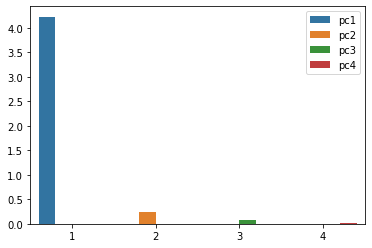

In [0]:
sns.barplot(np.arange(4)+1,model.explained_variance_,hue=['pc'+str(i) for i in range(1,5)])

The intrinsic dimension of the iris dataset is 1 - 2 D.
This is a scree plot.

You can use `model.explained_variance` or can use `np.var(transformed_samples,axis=0)` to get the variances of the principal components

In [0]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0],mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

## Dimension Reduction

In [0]:
model=PCA(2)# good choice for n_components is the intrinsic dimension
model.fit(df.values)
transformed=model.transform(df.values)

In [0]:
transformed.shape

(150, 2)

In [0]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
def species(x):
  if x==0:
    return 'setosa'
  elif x==1:
    return 'versicolor'
  else:
    return 'virginica'

s=list(map(species,data.target))

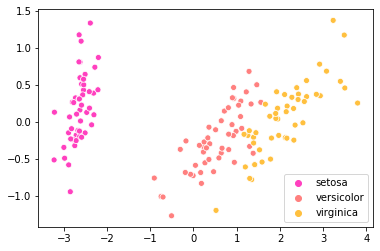

In [0]:
sns.scatterplot(transformed[:,0],transformed[:,1],hue=s,palette='spring')

Hence, we were able to represent 4D data in 2D using PCA.
* Note how PC1 (x-axis) is a better differentiator between classed than PC2.
* The model had no idea regarding which class a dataset belonged to but it was still able to represent it in the form of a "cluster".

## PCA in NLP

In [0]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

In [0]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD # PCA doesn't work with sparse matrices like tfidf
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50) # reduce tfidf matrix to 50 features (principal components)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6) # 6 clusters

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)


In [0]:
# Import pandas
import pandas as pd
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values(by='label'))
